# Módulo Selenium

Bom, agora que já falamos um pouco sobre webscraping e sobre os módulos *Requests* e *Beautiful Soup*, podemos falar sobre um módulo extremamente importante e que é muito utilizado também que é o *Selenium*. 

- Mas o que é o Selenium?

Selenium é um WebDriver, é uma API que fará com que o seu script de Python consiga conversar com o seu navegador e automatize tarefas. Se você já fez uma Macro no Excel para automatizar alguma coisa, pense que isso é um paralelo, porém automatizando tarefas no seu navegador!

Você pode estar se perguntando o porque de utilizar *Selenium*, sendo que nos notebooks anteriores nós conseguimos realizar o web scraping apenas utilizando o módulo *Requests*. E o motivo é o seguinte: <br><br>

Se você leu apenas os notebooks anteriores e tentou sair por aí fazendo web scraping em alguns sites e percebeu que não estava conseguindo, isso pode acontecer por motivos de o módulo *Requests* não conseguir trazer diretamente o HTML do site por meio de uma requisição Get. Como eu já disse anteriormente, não sou muito familiar com desenvolvimento web mas posso tentar me arriscar na explicação: <br><br>

Existem sites que "renderizam" apenas por meio do seu navegador, quando a página carrega totalmente, então por meio de uma requisição GET, a gente obtém outra resposta que não é o HTML do site (vou mostrar um exemplo desse caso com o site da Airbnb). E também existem sites que simplesmente bloqueiam requisições sem parametrizações adicionais que são fornecidas automaticamente pelo seu navegador (mostrarei um exemplo com o site da OLX). Para contornar esses problemas e conseguir fazer o web scraping nesses sites, podemos usar o Selenium!

Além disso, o Selenium pode ser utilizado para fazer interações com as páginas, um recurso que pode ser eventualmente necessário ou muito útil em alguns casos!

### Casos nos quais você pode precisar do Selenium:

Vamos tentar fazer uma requisição ao site da OLX pra ver o que acontece:

In [1]:
# Vamos importar o Requests
import requests as r

In [2]:
olx = r.get('https://www.olx.com.br/')
print(olx.status_code)

403


Veja que o código do status de nossa conexão é 403! E não o 200 (que significa conexão bem sucedida) que gostaríamos de ver... O código 403 em HTTP significa que a nossa conexão é proibida. E isso acontece porque o servidor bloqueia requisições que são feitas sem os chamados *headers*, que são parâmetros fornecidos por nosso navegador, de forma automática (por trás das cortinas) quando entramos no site!

Mas, podemos resolver isso, o que podemos fazer é inserir os parâmetros manualmente!

Eu fucei um pouco na função "Inspecionar" do Chrome e entrei na aba de "Network" ou "Rede" e encontrei os *headers* de nossa requisição! Pela minhas pesquisas, na maioria dos casos em que um site lhe proibir a requisição, é por conta da ausência do parâmetro `user-agent`, então eu copiei as informações que apareceram no Chrome, e tentei fazer o `GET` novamente, com os parâmetros, e veja que agora deu certo:

In [3]:
# user-agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.63 Safari/537.36
olx = r.get('https://www.olx.com.br/', headers={'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.63 Safari/537.36'})
print(olx.status_code)

200


Veja como encontrei as informações, entrando no site manualmente pelo Google Chrome:

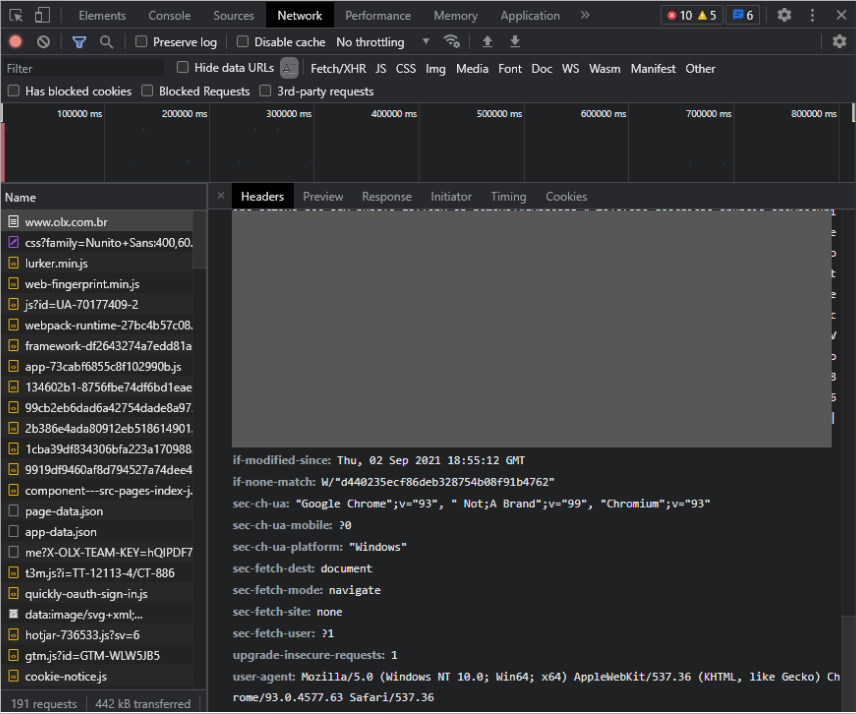

Porém, uma outra forma de resolver isso, seria pela utilização do *Selenium*!

Um outro caso em que uma requisição possa não funcionar e você precise usar o Selenium é quando o site é renderizado pelo cliente. Pelas minhas pesquisas, nesse caso não adianta tentar adicionar parâmetros à requisição, só funcionaria utilizando um *web driver*, que é o caso do site do Airbnb, por exemplo! Vamos dar uma olhada:


In [4]:
airbnb = r.get('https://www.airbnb.com.br/')
print(airbnb.status_code)

200


Veja que nossa requisição é bem sucedida! Porém o problema está no conteúdo que nos é retornado:

In [5]:
# Vou importar o Beautiful Soup pra darmos uma olhada no conteúdo:
from bs4 import BeautifulSoup as bs

airbnb_html = bs(airbnb.text, 'html.parser')
print(airbnb_html.prettify())

<!DOCTYPE html>
<html data-is-hyperloop="true" dir="ltr" lang="pt" xmlns:fb="http://ogp.me/ns/fb#">
 <head>
  <script>
   window.sherlock_firstbyte = window.performance && window.performance.timing ? window.performance.timing.responseStart : Number(new Date());
  </script>
  <script>
   !function(){"use strict";var n=window;const e="ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+/",o=new RegExp(`^\\d{10}_[${e}]{16}$`);const t=/(?:^| )bev=(.*?)(?:;|$)/;let c=!1;function i(){if(c||"undefined"==typeof document)return null;c=!0;const n=(document.cookie||"").match(t);if(!n||2!==n.length)return null;const e=decodeURIComponent(n[1]);return function(n){return o.test(n)}(e)?e:null}!function(){try{if(n.bev=n.bev||i(),!n.bev){const o=function(){const n=[];for(let o=0;o<16;o+=1)n.push(e[Math.floor(Math.random()*e.length)]);return`${Math.floor(Date.now()/1e3)}_${n.join("")}`}();!function(n){const{hostname:e}=document.location,o="."+e.slice(e.indexOf("airbnb.")),t=new Date;t.setDate(

In [8]:
# Vou importar também pelo Selenium. Não se preocupe, depois vou mostrar o passo a passo
from selenium import webdriver as s
from selenium.webdriver.chrome.options import Options
from time import sleep
options = Options()
options.add_argument('window-size=400,800')
navegador = s.Chrome(options=options)
navegador.get('https://www.airbnb.com.br/')
sleep(5)
airbnb_html2 = bs(navegador.page_source, 'html.parser')
print(airbnb_html2.prettify())

<html class="js-focus-visible" data-is-hyperloop="true" dir="ltr" lang="pt" xmlns:fb="http://ogp.me/ns/fb#">
 <head>
  <script async="" crossorigin="anonymous" integrity="sha384-Me/xBbBvuuItTu/oAnI7UkdtjfgtuZXbaYLJKHlUuMOlG+7MivghWo/kKOwhQ7pf" src="https://www.gstatic.com/recaptcha/releases/wxAi4AKLXL2kBAvXqI4XLSWS/recaptcha__en.js" type="text/javascript">
  </script>
  <script async="" src="https://www.googletagmanager.com/gtm.js?id=GTM-46MK">
  </script>
  <script>
   window.sherlock_firstbyte = window.performance && window.performance.timing ? window.performance.timing.responseStart : Number(new Date());
  </script>
  <script>
   !function(){"use strict";var n=window;const e="ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+/",o=new RegExp(`^\\d{10}_[${e}]{16}$`);const t=/(?:^| )bev=(.*?)(?:;|$)/;let c=!1;function i(){if(c||"undefined"==typeof document)return null;c=!0;const n=(document.cookie||"").match(t);if(!n||2!==n.length)return null;const e=decodeURIComponent(n[1

Veja o seguinte, o HTML da nossa requisição GET é diferente do HTML obtido por meio do nosso webdriver! Por conta disso, pra garantir que estamos vendo o mesmo HTML de quando abrimos a página manualmente, temos que utilizar o *Selenium*!

In [7]:
airbnb_html2.prettify() == airbnb_html.prettify()

False

## Vamos começar a trabalhar com Selenium...

Sem mais delongas, vamos começar a trabalhar com o *Selenium*...
Recomendo que dê uma olhada na [documentação](https://selenium-python.readthedocs.io/installation.html) para verificar a instalação e os detalhes do que você tem que fazer para que tudo funcione corretamente!

O nosso exercício será fazer mais ou menos o que fizemos no notebook anterior para o Mercado Livre, porém utilizando o Selenium para navegar no site!

In [22]:
# Vamos importar tudo que é necessário para fazer nossa automação:

from selenium import webdriver as sln
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup as bs

# Parametrizações Iniciais:

options = Options()
options.add_argument('window-size=500,1000')
navegador = sln.Chrome(options=options)

# Começando a dar comandos para o navegador

navegador.get('https://www.mercadolivre.com.br/')

Se você conseguiu rodar os comandos acima com sucesso, viu que seu navegador já abriu e entrou na página do Mercado Livre automaticamente!!!

In [26]:
# <input type="text" class="nav-search-input" aria-label="Digite o que você quer encontrar" name="as_word" placeholder="Buscar produtos, marcas e muito mais…" maxlength="120" autofocus="" autocapitalize="off" autocorrect="off" spellcheck="false" autocomplete="off" tabindex="2">

options = Options()
options.add_argument('window-size=500,1000')
navegador = sln.Chrome(options=options)
navegador.get('https://www.mercadolivre.com.br/')

# ^ Entra no site

sleep(2)

pesquisa = navegador.find_element_by_class_name('nav-search-input')
pesquisa.send_keys('celular')
pesquisa.submit()

# ^ Pesquisa por celular

Agora que estamos na página, podemos "puxar" seu HTML para começar a extrair as informações da mesma exata maneira do notebook anterior!!!

In [28]:
# <input type="text" class="nav-search-input" aria-label="Digite o que você quer encontrar" name="as_word" placeholder="Buscar produtos, marcas e muito mais…" maxlength="120" autofocus="" autocapitalize="off" autocorrect="off" spellcheck="false" autocomplete="off" tabindex="2">

options = Options()
options.add_argument('window-size=500,1000')
navegador = sln.Chrome(options=options)
navegador.get('https://www.mercadolivre.com.br/')

# ^ Entra no site

sleep(2)

pesquisa = navegador.find_element_by_class_name('nav-search-input')
pesquisa.send_keys('celular')
pesquisa.submit()

# ^ Pesquisa por celular

ml_html = navegador.page_source

site_ml = bs(ml_html, 'html.parser')


In [29]:
print(site_ml.prettify())

<html lang="pt-BR">
 <head>
  <link href="https://www.google-analytics.com" rel="preconnect"/>
  <link href="https://www.google.com" rel="preconnect"/>
  <link href="https://data.mercadolibre.com" rel="preconnect"/>
  <link href="https://http2.mlstatic.com" rel="preconnect"/>
  <link href="https://www.google.com.br" rel="preconnect"/>
  <iframe id="GoogleAnalyticsIframe" src="about:blank" style="width: 0px; height: 0px; border: 0px; position: absolute;">
  </iframe>
  <iframe id="MelidataIframe" src="about:srcdoc" srcdoc="&lt;script src='https://http2.mlstatic.com/storage/melidata-js-sdk/js/3/0.3.12-rollback/melidata.min.js'&gt;&lt;/script&gt;" style="width: 0px; height: 0px; border: 0px; position: absolute;">
  </iframe>
  <script src="https://js-agent.newrelic.com/nr-1210.min.js">
  </script>
  <script type="text/javascript">
   window.NREUM||(NREUM={});NREUM.info = {"agent":"","beacon":"bam-cell.nr-data.net","errorBeacon":"bam-cell.nr-data.net","licenseKey":"3009922991","application

In [30]:
produtos = site_ml.findAll('div', attrs={'class': 'ui-search-result__content-wrapper'})
# Utilizo findAll em vez de find!

In [31]:
for produto in produtos:
    
    # nome : <h2 class="ui-search-item__title">Apple iPhone 12 (128 GB) - Roxo</h2>
    nome = produto.find('h2', attrs={'class' : 'ui-search-item__title'})
    # preço : <span class="price-tag-fraction">724</span>
    preco = produto.find('span', attrs={'class' : 'price-tag-fraction'})
    # centavos : <span class="price-tag-cents">50</span>
    centavos = produto.find('span', attrs={'class' : 'price-tag-cents'})
    # link : <a class="ui-search-item__group__element ui-search-link"
    link = produto.find('a', attrs={'class' : 'ui-search-item__group__element ui-search-link'})
    
    if (centavos): #nem todo o produto possui o valor para centavos, então precisa checar
        
        print('Temos o produto {} que custa {},{} reais'.format(nome.text, preco.text, centavos.text))
        print(link['href'])
        print('\n') # Coloco uma quebra de linha a cada print
        
    else:

        print('Temos o produto {} que custa {} reais'.format(nome.text, preco.text))
        print(link['href'])
        print('\n') # Coloco uma quebra de linha a cada print

Temos o produto  Moto E6i Dual SIM 32 GB pink 2 GB RAM que custa 1.099,58 reais
https://www.mercadolivre.com.br/moto-e6i-dual-sim-32-gb-pink-2-gb-ram/p/MLB17457350?pdp_filters=category:MLB1055#searchVariation=MLB17457350&position=1&search_layout=stack&type=product&tracking_id=0c8a19ad-229a-481d-b529-2135aa025a88


Temos o produto Samsung Galaxy A02 Dual SIM 32 GB preto 2 GB RAM que custa 679,75 reais
https://www.mercadolivre.com.br/samsung-galaxy-a02-dual-sim-32-gb-preto-2-gb-ram/p/MLB17449007?pdp_filters=category:MLB1055#searchVariation=MLB17449007&position=2&search_layout=stack&type=product&tracking_id=0c8a19ad-229a-481d-b529-2135aa025a88


Temos o produto Multilaser Flip Vita Dual SIM 32 MB azul 32 MB RAM que custa 159,25 reais
https://www.mercadolivre.com.br/multilaser-flip-vita-dual-sim-32-mb-azul-32-mb-ram/p/MLB9903928?pdp_filters=category:MLB1055#searchVariation=MLB9903928&position=3&search_layout=stack&type=product&tracking_id=0c8a19ad-229a-481d-b529-2135aa025a88


Temos o prod

Veja que obtivemos o mesmo resultado do notebook anterior, utilizando uma metodologia diferente!!!

Esse é o fim dos notebooks sobre web scraping, mas de forma alguma abordam totalmente o conteúdo desses módulos e muito menos do conceito de web scraping como um todo. Eu apenas introduzi conceitos e mostrei superficialmente o funcionamento de alguns módulos. Agora sinta-se livre para começar a trabalhar nos seus próprios projetos e se aprofundar mais no assunto!!

Criado por: <br><br>

Reddit: **u/_jvsm**